In [1]:
import tensorflow as tf
import os
import tiktoken
from tqdm import tqdm
from model import *

2023-06-03 12:34:17.825737: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-03 12:34:18.086245: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
tf.config.list_physical_devices('GPU')

2023-06-03 12:34:21.036283: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

2023-06-03 12:34:21.228249: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-03 12:34:21.228556: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [3]:
physical_devices = tf.config.list_physical_devices('GPU')
try:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
except:
    print("Could not set memory growth")
    # Invalid device or cannot modify virtual devices once initialized.
    pass

In [4]:
# Byte Pair Encoder
enc = tiktoken.get_encoding("p50k_base")

In [5]:
model = Multinomial_Model()

2023-06-03 12:34:21.256757: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-03 12:34:21.259167: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-03 12:34:21.259357: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-03 12:34:21.259416: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node,

In [6]:
# params:
learning_rate = 1e-3

In [7]:
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

In [9]:
val_data = tf.data.Dataset.load(f"./shards/val_shard")
loss_epoch = []
val_loss_epoch = []

In [10]:
epochs = 40
for epoch in range(epochs):
    print(f"\nStart of epoch {epoch}:")
    loss_total = 0
    count_train = 0
    for file in os.listdir("./shards"):
        if file.startswith("shard"):
            print(f"working on {file}...")
            curr_train = tf.data.Dataset.load(f"./shards/{file}")
            with tqdm(total=len(curr_train)) as pbar:
                for x, y in curr_train: # Of size (batch, embd)
                    with tf.GradientTape() as tape:
                        logits, loss = model(x = x, y = y, training=True)
                    loss_total += loss
                    count_train += 1
                    grads = tape.gradient(loss, model.trainable_weights)
                    optimizer.apply_gradients(zip(grads, model.trainable_weights))
                    pbar.update(1)
    #### Validation:
    val_loss_total = 0
    count_val = 0
    for x_val, y_val in val_data:
        _, val_loss = model(x = x_val, y = y_val, training=False)
        val_loss_total += val_loss
        count_val += 1
    avg_train_loss = loss_total/count_train
    avg_val_loss = val_loss_total / count_val
    loss_epoch.append(avg_train_loss)
    val_loss_epoch.append(avg_val_loss)
    print(f"Average Training loss: {avg_train_loss}")
    print(f"Average Validation loss : {avg_val_loss}")
    print("------------------------------------\n")


Start of epoch 0:
working on shard_0...


  0%|                                                             | 0/473 [00:00<?, ?it/s]2023-06-03 12:34:54.365974: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8401
2023-06-03 12:34:54.489329: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
100%|███████████████████████████████████████████████████| 473/473 [01:57<00:00,  4.04it/s]


working on shard_1...


100%|███████████████████████████████████████████████████| 473/473 [01:55<00:00,  4.09it/s]


working on shard_3...


100%|███████████████████████████████████████████████████| 473/473 [01:55<00:00,  4.09it/s]


working on shard_2...


100%|███████████████████████████████████████████████████| 473/473 [01:55<00:00,  4.09it/s]


Average Training loss: 1.3140785694122314
Average Validation loss : 0.13874676823616028
------------------------------------


Start of epoch 1:
working on shard_0...


100%|███████████████████████████████████████████████████| 473/473 [01:55<00:00,  4.10it/s]


working on shard_1...


100%|███████████████████████████████████████████████████| 473/473 [01:55<00:00,  4.09it/s]


working on shard_3...


100%|███████████████████████████████████████████████████| 473/473 [01:55<00:00,  4.10it/s]


working on shard_2...


100%|███████████████████████████████████████████████████| 473/473 [01:55<00:00,  4.11it/s]


Average Training loss: 0.2136611044406891
Average Validation loss : 0.10739582031965256
------------------------------------


Start of epoch 2:
working on shard_0...


100%|███████████████████████████████████████████████████| 473/473 [01:54<00:00,  4.12it/s]


working on shard_1...


100%|███████████████████████████████████████████████████| 473/473 [01:54<00:00,  4.13it/s]


working on shard_3...


100%|███████████████████████████████████████████████████| 473/473 [01:54<00:00,  4.12it/s]


working on shard_2...


100%|███████████████████████████████████████████████████| 473/473 [01:54<00:00,  4.13it/s]


Average Training loss: 0.1654091328382492
Average Validation loss : 0.09727030247449875
------------------------------------


Start of epoch 3:
working on shard_0...


100%|███████████████████████████████████████████████████| 473/473 [01:54<00:00,  4.12it/s]


working on shard_1...


100%|███████████████████████████████████████████████████| 473/473 [01:54<00:00,  4.11it/s]


working on shard_3...


100%|███████████████████████████████████████████████████| 473/473 [01:54<00:00,  4.13it/s]


working on shard_2...


100%|███████████████████████████████████████████████████| 473/473 [01:54<00:00,  4.13it/s]


Average Training loss: 0.14292699098587036
Average Validation loss : 0.08960308134555817
------------------------------------


Start of epoch 4:
working on shard_0...


100%|███████████████████████████████████████████████████| 473/473 [01:54<00:00,  4.13it/s]


working on shard_1...


100%|███████████████████████████████████████████████████| 473/473 [01:54<00:00,  4.13it/s]


working on shard_3...


100%|███████████████████████████████████████████████████| 473/473 [01:54<00:00,  4.14it/s]


working on shard_2...


100%|███████████████████████████████████████████████████| 473/473 [01:54<00:00,  4.14it/s]


Average Training loss: 0.12925046682357788
Average Validation loss : 0.08498594164848328
------------------------------------


Start of epoch 5:
working on shard_0...


100%|███████████████████████████████████████████████████| 473/473 [01:54<00:00,  4.13it/s]


working on shard_1...


100%|███████████████████████████████████████████████████| 473/473 [01:54<00:00,  4.13it/s]


working on shard_3...


100%|███████████████████████████████████████████████████| 473/473 [01:54<00:00,  4.12it/s]


working on shard_2...


100%|███████████████████████████████████████████████████| 473/473 [01:54<00:00,  4.12it/s]


Average Training loss: 0.11912300437688828
Average Validation loss : 0.08212873339653015
------------------------------------


Start of epoch 6:
working on shard_0...


100%|███████████████████████████████████████████████████| 473/473 [01:54<00:00,  4.13it/s]


working on shard_1...


100%|███████████████████████████████████████████████████| 473/473 [01:54<00:00,  4.13it/s]


working on shard_3...


100%|███████████████████████████████████████████████████| 473/473 [01:54<00:00,  4.12it/s]


working on shard_2...


100%|███████████████████████████████████████████████████| 473/473 [01:54<00:00,  4.13it/s]


Average Training loss: 0.11216577142477036
Average Validation loss : 0.07949937880039215
------------------------------------


Start of epoch 7:
working on shard_0...


100%|███████████████████████████████████████████████████| 473/473 [01:54<00:00,  4.14it/s]


working on shard_1...


100%|███████████████████████████████████████████████████| 473/473 [01:54<00:00,  4.13it/s]


working on shard_3...


100%|███████████████████████████████████████████████████| 473/473 [01:54<00:00,  4.13it/s]


working on shard_2...


100%|███████████████████████████████████████████████████| 473/473 [01:54<00:00,  4.15it/s]


Average Training loss: 0.10622765868902206
Average Validation loss : 0.0777917355298996
------------------------------------


Start of epoch 8:
working on shard_0...


100%|███████████████████████████████████████████████████| 473/473 [01:53<00:00,  4.16it/s]


working on shard_1...


100%|███████████████████████████████████████████████████| 473/473 [01:53<00:00,  4.15it/s]


working on shard_3...


100%|███████████████████████████████████████████████████| 473/473 [01:54<00:00,  4.15it/s]


working on shard_2...


100%|███████████████████████████████████████████████████| 473/473 [01:53<00:00,  4.16it/s]


Average Training loss: 0.10142353922128677
Average Validation loss : 0.07621459662914276
------------------------------------


Start of epoch 9:
working on shard_0...


100%|███████████████████████████████████████████████████| 473/473 [01:53<00:00,  4.16it/s]


working on shard_1...


100%|███████████████████████████████████████████████████| 473/473 [01:53<00:00,  4.17it/s]


working on shard_3...


100%|███████████████████████████████████████████████████| 473/473 [01:53<00:00,  4.17it/s]


working on shard_2...


100%|███████████████████████████████████████████████████| 473/473 [01:53<00:00,  4.17it/s]


Average Training loss: 0.09755903482437134
Average Validation loss : 0.07451552897691727
------------------------------------


Start of epoch 10:
working on shard_0...


100%|███████████████████████████████████████████████████| 473/473 [01:53<00:00,  4.17it/s]


working on shard_1...


100%|███████████████████████████████████████████████████| 473/473 [01:53<00:00,  4.17it/s]


working on shard_3...


100%|███████████████████████████████████████████████████| 473/473 [01:53<00:00,  4.17it/s]


working on shard_2...


100%|███████████████████████████████████████████████████| 473/473 [01:53<00:00,  4.17it/s]


Average Training loss: 0.09414941072463989
Average Validation loss : 0.07380060851573944
------------------------------------


Start of epoch 11:
working on shard_0...


100%|███████████████████████████████████████████████████| 473/473 [01:53<00:00,  4.18it/s]


working on shard_1...


100%|███████████████████████████████████████████████████| 473/473 [01:53<00:00,  4.17it/s]


working on shard_3...


100%|███████████████████████████████████████████████████| 473/473 [01:53<00:00,  4.17it/s]


working on shard_2...


100%|███████████████████████████████████████████████████| 473/473 [01:53<00:00,  4.17it/s]


Average Training loss: 0.09146063774824142
Average Validation loss : 0.0725451409816742
------------------------------------


Start of epoch 12:
working on shard_0...


100%|███████████████████████████████████████████████████| 473/473 [01:53<00:00,  4.17it/s]


working on shard_1...


100%|███████████████████████████████████████████████████| 473/473 [01:53<00:00,  4.17it/s]


working on shard_3...


100%|███████████████████████████████████████████████████| 473/473 [01:53<00:00,  4.17it/s]


working on shard_2...


100%|███████████████████████████████████████████████████| 473/473 [01:53<00:00,  4.17it/s]


Average Training loss: 0.08885439485311508
Average Validation loss : 0.07140239328145981
------------------------------------


Start of epoch 13:
working on shard_0...


100%|███████████████████████████████████████████████████| 473/473 [01:53<00:00,  4.17it/s]


working on shard_1...


100%|███████████████████████████████████████████████████| 473/473 [01:53<00:00,  4.17it/s]


working on shard_3...


100%|███████████████████████████████████████████████████| 473/473 [01:53<00:00,  4.17it/s]


working on shard_2...


100%|███████████████████████████████████████████████████| 473/473 [01:53<00:00,  4.18it/s]


Average Training loss: 0.08663689345121384
Average Validation loss : 0.0706879273056984
------------------------------------


Start of epoch 14:
working on shard_0...


100%|███████████████████████████████████████████████████| 473/473 [01:53<00:00,  4.18it/s]


working on shard_1...


100%|███████████████████████████████████████████████████| 473/473 [01:53<00:00,  4.18it/s]


working on shard_3...


100%|███████████████████████████████████████████████████| 473/473 [01:53<00:00,  4.17it/s]


working on shard_2...


100%|███████████████████████████████████████████████████| 473/473 [01:53<00:00,  4.17it/s]


Average Training loss: 0.08449321240186691
Average Validation loss : 0.07000535726547241
------------------------------------


Start of epoch 15:
working on shard_0...


100%|███████████████████████████████████████████████████| 473/473 [01:53<00:00,  4.18it/s]


working on shard_1...


100%|███████████████████████████████████████████████████| 473/473 [01:53<00:00,  4.18it/s]


working on shard_3...


100%|███████████████████████████████████████████████████| 473/473 [01:52<00:00,  4.19it/s]


working on shard_2...


100%|███████████████████████████████████████████████████| 473/473 [01:52<00:00,  4.19it/s]


Average Training loss: 0.08295506238937378
Average Validation loss : 0.06955817341804504
------------------------------------


Start of epoch 16:
working on shard_0...


100%|███████████████████████████████████████████████████| 473/473 [01:52<00:00,  4.19it/s]


working on shard_1...


100%|███████████████████████████████████████████████████| 473/473 [01:52<00:00,  4.19it/s]


working on shard_3...


100%|███████████████████████████████████████████████████| 473/473 [01:52<00:00,  4.19it/s]


working on shard_2...


100%|███████████████████████████████████████████████████| 473/473 [01:53<00:00,  4.18it/s]


Average Training loss: 0.08132068067789078
Average Validation loss : 0.06884113699197769
------------------------------------


Start of epoch 17:
working on shard_0...


100%|███████████████████████████████████████████████████| 473/473 [01:52<00:00,  4.19it/s]


working on shard_1...


100%|███████████████████████████████████████████████████| 473/473 [01:52<00:00,  4.19it/s]


working on shard_3...


100%|███████████████████████████████████████████████████| 473/473 [01:53<00:00,  4.18it/s]


working on shard_2...


100%|███████████████████████████████████████████████████| 473/473 [01:52<00:00,  4.19it/s]


Average Training loss: 0.07982244342565536
Average Validation loss : 0.06846224516630173
------------------------------------


Start of epoch 18:
working on shard_0...


100%|███████████████████████████████████████████████████| 473/473 [01:52<00:00,  4.19it/s]


working on shard_1...


100%|███████████████████████████████████████████████████| 473/473 [01:52<00:00,  4.19it/s]


working on shard_3...


100%|███████████████████████████████████████████████████| 473/473 [01:52<00:00,  4.19it/s]


working on shard_2...


100%|███████████████████████████████████████████████████| 473/473 [01:53<00:00,  4.18it/s]


Average Training loss: 0.07855717092752457
Average Validation loss : 0.06812875717878342
------------------------------------


Start of epoch 19:
working on shard_0...


100%|███████████████████████████████████████████████████| 473/473 [01:53<00:00,  4.18it/s]


working on shard_1...


100%|███████████████████████████████████████████████████| 473/473 [01:53<00:00,  4.19it/s]


working on shard_3...


100%|███████████████████████████████████████████████████| 473/473 [01:52<00:00,  4.19it/s]


working on shard_2...


100%|███████████████████████████████████████████████████| 473/473 [01:52<00:00,  4.19it/s]


Average Training loss: 0.07729420065879822
Average Validation loss : 0.06766320765018463
------------------------------------


Start of epoch 20:
working on shard_0...


100%|███████████████████████████████████████████████████| 473/473 [01:52<00:00,  4.19it/s]


working on shard_1...


100%|███████████████████████████████████████████████████| 473/473 [01:52<00:00,  4.20it/s]


working on shard_3...


100%|███████████████████████████████████████████████████| 473/473 [01:52<00:00,  4.19it/s]


working on shard_2...


100%|███████████████████████████████████████████████████| 473/473 [01:52<00:00,  4.19it/s]


Average Training loss: 0.07619854062795639
Average Validation loss : 0.06729897856712341
------------------------------------


Start of epoch 21:
working on shard_0...


100%|███████████████████████████████████████████████████| 473/473 [01:52<00:00,  4.19it/s]


working on shard_1...


100%|███████████████████████████████████████████████████| 473/473 [01:53<00:00,  4.18it/s]


working on shard_3...


100%|███████████████████████████████████████████████████| 473/473 [01:52<00:00,  4.19it/s]


working on shard_2...


100%|███████████████████████████████████████████████████| 473/473 [01:52<00:00,  4.19it/s]


Average Training loss: 0.0751541256904602
Average Validation loss : 0.06704062968492508
------------------------------------


Start of epoch 22:
working on shard_0...


100%|███████████████████████████████████████████████████| 473/473 [01:52<00:00,  4.20it/s]


working on shard_1...


100%|███████████████████████████████████████████████████| 473/473 [01:53<00:00,  4.18it/s]


working on shard_3...


100%|███████████████████████████████████████████████████| 473/473 [01:52<00:00,  4.19it/s]


working on shard_2...


100%|███████████████████████████████████████████████████| 473/473 [01:53<00:00,  4.18it/s]


Average Training loss: 0.07413646578788757
Average Validation loss : 0.0668458640575409
------------------------------------


Start of epoch 23:
working on shard_0...


100%|███████████████████████████████████████████████████| 473/473 [01:52<00:00,  4.20it/s]


working on shard_1...


100%|███████████████████████████████████████████████████| 473/473 [01:52<00:00,  4.20it/s]


working on shard_3...


100%|███████████████████████████████████████████████████| 473/473 [01:53<00:00,  4.18it/s]


working on shard_2...


100%|███████████████████████████████████████████████████| 473/473 [01:52<00:00,  4.19it/s]


Average Training loss: 0.07333900034427643
Average Validation loss : 0.0665135383605957
------------------------------------


Start of epoch 24:
working on shard_0...


100%|███████████████████████████████████████████████████| 473/473 [01:52<00:00,  4.20it/s]


working on shard_1...


100%|███████████████████████████████████████████████████| 473/473 [01:53<00:00,  4.18it/s]


working on shard_3...


100%|███████████████████████████████████████████████████| 473/473 [01:52<00:00,  4.19it/s]


working on shard_2...


100%|███████████████████████████████████████████████████| 473/473 [01:52<00:00,  4.19it/s]


Average Training loss: 0.07250750809907913
Average Validation loss : 0.066367007791996
------------------------------------


Start of epoch 25:
working on shard_0...


100%|███████████████████████████████████████████████████| 473/473 [01:52<00:00,  4.19it/s]


working on shard_1...


100%|███████████████████████████████████████████████████| 473/473 [01:53<00:00,  4.18it/s]


working on shard_3...


100%|███████████████████████████████████████████████████| 473/473 [01:53<00:00,  4.18it/s]


working on shard_2...


100%|███████████████████████████████████████████████████| 473/473 [01:53<00:00,  4.18it/s]


Average Training loss: 0.07171740382909775
Average Validation loss : 0.06598249077796936
------------------------------------


Start of epoch 26:
working on shard_0...


100%|███████████████████████████████████████████████████| 473/473 [01:52<00:00,  4.19it/s]


working on shard_1...


100%|███████████████████████████████████████████████████| 473/473 [01:53<00:00,  4.19it/s]


working on shard_3...


100%|███████████████████████████████████████████████████| 473/473 [01:53<00:00,  4.18it/s]


working on shard_2...


100%|███████████████████████████████████████████████████| 473/473 [01:52<00:00,  4.19it/s]


Average Training loss: 0.0710267424583435
Average Validation loss : 0.06602613627910614
------------------------------------


Start of epoch 27:
working on shard_0...


100%|███████████████████████████████████████████████████| 473/473 [01:53<00:00,  4.19it/s]


working on shard_1...


100%|███████████████████████████████████████████████████| 473/473 [01:52<00:00,  4.19it/s]


working on shard_3...


100%|███████████████████████████████████████████████████| 473/473 [01:52<00:00,  4.20it/s]


working on shard_2...


100%|███████████████████████████████████████████████████| 473/473 [01:52<00:00,  4.19it/s]


Average Training loss: 0.07026895135641098
Average Validation loss : 0.06577864289283752
------------------------------------


Start of epoch 28:
working on shard_0...


100%|███████████████████████████████████████████████████| 473/473 [01:53<00:00,  4.17it/s]


working on shard_1...


100%|███████████████████████████████████████████████████| 473/473 [01:55<00:00,  4.10it/s]


working on shard_3...


100%|███████████████████████████████████████████████████| 473/473 [01:54<00:00,  4.12it/s]


working on shard_2...


100%|███████████████████████████████████████████████████| 473/473 [01:55<00:00,  4.10it/s]


Average Training loss: 0.06973135471343994
Average Validation loss : 0.06540010124444962
------------------------------------


Start of epoch 29:
working on shard_0...


100%|███████████████████████████████████████████████████| 473/473 [01:54<00:00,  4.15it/s]


working on shard_1...


100%|███████████████████████████████████████████████████| 473/473 [01:54<00:00,  4.14it/s]


working on shard_3...


100%|███████████████████████████████████████████████████| 473/473 [01:54<00:00,  4.15it/s]


working on shard_2...


100%|███████████████████████████████████████████████████| 473/473 [01:54<00:00,  4.14it/s]


Average Training loss: 0.06905393302440643
Average Validation loss : 0.06547914445400238
------------------------------------


Start of epoch 30:
working on shard_0...


100%|███████████████████████████████████████████████████| 473/473 [01:54<00:00,  4.13it/s]


working on shard_1...


100%|███████████████████████████████████████████████████| 473/473 [01:54<00:00,  4.13it/s]


working on shard_3...


100%|███████████████████████████████████████████████████| 473/473 [01:54<00:00,  4.14it/s]


working on shard_2...


100%|███████████████████████████████████████████████████| 473/473 [01:54<00:00,  4.15it/s]


Average Training loss: 0.06844040751457214
Average Validation loss : 0.06541857868432999
------------------------------------


Start of epoch 31:
working on shard_0...


100%|███████████████████████████████████████████████████| 473/473 [01:54<00:00,  4.15it/s]


working on shard_1...


100%|███████████████████████████████████████████████████| 473/473 [01:54<00:00,  4.13it/s]


working on shard_3...


100%|███████████████████████████████████████████████████| 473/473 [01:54<00:00,  4.14it/s]


working on shard_2...


100%|███████████████████████████████████████████████████| 473/473 [01:54<00:00,  4.15it/s]


Average Training loss: 0.06798633188009262
Average Validation loss : 0.065355584025383
------------------------------------


Start of epoch 32:
working on shard_0...


100%|███████████████████████████████████████████████████| 473/473 [01:54<00:00,  4.14it/s]


working on shard_1...


100%|███████████████████████████████████████████████████| 473/473 [01:53<00:00,  4.15it/s]


working on shard_3...


100%|███████████████████████████████████████████████████| 473/473 [01:53<00:00,  4.15it/s]


working on shard_2...


100%|███████████████████████████████████████████████████| 473/473 [01:53<00:00,  4.15it/s]


Average Training loss: 0.06748953461647034
Average Validation loss : 0.06507446616888046
------------------------------------


Start of epoch 33:
working on shard_0...


100%|███████████████████████████████████████████████████| 473/473 [01:53<00:00,  4.15it/s]


working on shard_1...


100%|███████████████████████████████████████████████████| 473/473 [01:53<00:00,  4.15it/s]


working on shard_3...


100%|███████████████████████████████████████████████████| 473/473 [01:53<00:00,  4.15it/s]


working on shard_2...


100%|███████████████████████████████████████████████████| 473/473 [01:53<00:00,  4.15it/s]


Average Training loss: 0.0669824555516243
Average Validation loss : 0.06482426077127457
------------------------------------


Start of epoch 34:
working on shard_0...


100%|███████████████████████████████████████████████████| 473/473 [01:54<00:00,  4.14it/s]


working on shard_1...


100%|███████████████████████████████████████████████████| 473/473 [01:54<00:00,  4.15it/s]


working on shard_3...


100%|███████████████████████████████████████████████████| 473/473 [01:54<00:00,  4.13it/s]


working on shard_2...


100%|███████████████████████████████████████████████████| 473/473 [01:54<00:00,  4.13it/s]


Average Training loss: 0.06662101298570633
Average Validation loss : 0.06451667845249176
------------------------------------


Start of epoch 35:
working on shard_0...


100%|███████████████████████████████████████████████████| 473/473 [01:54<00:00,  4.13it/s]


working on shard_1...


100%|███████████████████████████████████████████████████| 473/473 [01:54<00:00,  4.12it/s]


working on shard_3...


100%|███████████████████████████████████████████████████| 473/473 [01:55<00:00,  4.11it/s]


working on shard_2...


100%|███████████████████████████████████████████████████| 473/473 [01:55<00:00,  4.10it/s]


Average Training loss: 0.0661359503865242
Average Validation loss : 0.06486214697360992
------------------------------------


Start of epoch 36:
working on shard_0...


100%|███████████████████████████████████████████████████| 473/473 [01:55<00:00,  4.10it/s]


working on shard_1...


100%|███████████████████████████████████████████████████| 473/473 [01:55<00:00,  4.09it/s]


working on shard_3...


100%|███████████████████████████████████████████████████| 473/473 [01:55<00:00,  4.10it/s]


working on shard_2...


100%|███████████████████████████████████████████████████| 473/473 [01:55<00:00,  4.09it/s]


Average Training loss: 0.06580501049757004
Average Validation loss : 0.06422491371631622
------------------------------------


Start of epoch 37:
working on shard_0...


100%|███████████████████████████████████████████████████| 473/473 [01:55<00:00,  4.10it/s]


working on shard_1...


100%|███████████████████████████████████████████████████| 473/473 [01:55<00:00,  4.09it/s]


working on shard_3...


100%|███████████████████████████████████████████████████| 473/473 [01:55<00:00,  4.09it/s]


working on shard_2...


100%|███████████████████████████████████████████████████| 473/473 [01:55<00:00,  4.08it/s]


Average Training loss: 0.0652569830417633
Average Validation loss : 0.06427577137947083
------------------------------------


Start of epoch 38:
working on shard_0...


100%|███████████████████████████████████████████████████| 473/473 [01:55<00:00,  4.09it/s]


working on shard_1...


100%|███████████████████████████████████████████████████| 473/473 [01:55<00:00,  4.09it/s]


working on shard_3...


100%|███████████████████████████████████████████████████| 473/473 [01:55<00:00,  4.08it/s]


working on shard_2...


100%|███████████████████████████████████████████████████| 473/473 [01:56<00:00,  4.07it/s]


Average Training loss: 0.06504936516284943
Average Validation loss : 0.06438954919576645
------------------------------------


Start of epoch 39:
working on shard_0...


100%|███████████████████████████████████████████████████| 473/473 [01:55<00:00,  4.08it/s]


working on shard_1...


100%|███████████████████████████████████████████████████| 473/473 [01:56<00:00,  4.08it/s]


working on shard_3...


100%|███████████████████████████████████████████████████| 473/473 [01:56<00:00,  4.05it/s]


working on shard_2...


100%|███████████████████████████████████████████████████| 473/473 [01:56<00:00,  4.05it/s]


Average Training loss: 0.0645553395152092
Average Validation loss : 0.06439438462257385
------------------------------------


Start of epoch 40:
working on shard_0...


100%|███████████████████████████████████████████████████| 473/473 [01:56<00:00,  4.07it/s]


working on shard_1...


100%|███████████████████████████████████████████████████| 473/473 [01:56<00:00,  4.07it/s]


working on shard_3...


100%|███████████████████████████████████████████████████| 473/473 [01:56<00:00,  4.07it/s]


working on shard_2...


100%|███████████████████████████████████████████████████| 473/473 [01:56<00:00,  4.07it/s]


Average Training loss: 0.06426060944795609
Average Validation loss : 0.06435683369636536
------------------------------------


Start of epoch 41:
working on shard_0...


100%|███████████████████████████████████████████████████| 473/473 [01:56<00:00,  4.07it/s]


working on shard_1...


100%|███████████████████████████████████████████████████| 473/473 [01:56<00:00,  4.06it/s]


working on shard_3...


100%|███████████████████████████████████████████████████| 473/473 [01:56<00:00,  4.05it/s]


working on shard_2...


100%|███████████████████████████████████████████████████| 473/473 [01:56<00:00,  4.06it/s]


Average Training loss: 0.06389717757701874
Average Validation loss : 0.06437025219202042
------------------------------------


Start of epoch 42:
working on shard_0...


100%|███████████████████████████████████████████████████| 473/473 [01:56<00:00,  4.05it/s]


working on shard_1...


100%|███████████████████████████████████████████████████| 473/473 [01:56<00:00,  4.06it/s]


working on shard_3...


100%|███████████████████████████████████████████████████| 473/473 [01:56<00:00,  4.06it/s]


working on shard_2...


100%|███████████████████████████████████████████████████| 473/473 [01:56<00:00,  4.05it/s]


Average Training loss: 0.06352069973945618
Average Validation loss : 0.06420465558767319
------------------------------------


Start of epoch 43:
working on shard_0...


100%|███████████████████████████████████████████████████| 473/473 [01:56<00:00,  4.06it/s]


working on shard_1...


100%|███████████████████████████████████████████████████| 473/473 [01:57<00:00,  4.04it/s]


working on shard_3...


100%|███████████████████████████████████████████████████| 473/473 [01:57<00:00,  4.03it/s]


working on shard_2...


100%|███████████████████████████████████████████████████| 473/473 [01:56<00:00,  4.05it/s]


Average Training loss: 0.06333813071250916
Average Validation loss : 0.06418073922395706
------------------------------------


Start of epoch 44:
working on shard_0...


100%|███████████████████████████████████████████████████| 473/473 [01:56<00:00,  4.06it/s]


working on shard_1...


100%|███████████████████████████████████████████████████| 473/473 [01:56<00:00,  4.06it/s]


working on shard_3...


100%|███████████████████████████████████████████████████| 473/473 [01:56<00:00,  4.05it/s]


working on shard_2...


100%|███████████████████████████████████████████████████| 473/473 [01:56<00:00,  4.06it/s]


Average Training loss: 0.06303820013999939
Average Validation loss : 0.06423349678516388
------------------------------------


Start of epoch 45:
working on shard_0...


100%|███████████████████████████████████████████████████| 473/473 [01:56<00:00,  4.05it/s]


working on shard_1...


100%|███████████████████████████████████████████████████| 473/473 [01:57<00:00,  4.03it/s]


working on shard_3...


100%|███████████████████████████████████████████████████| 473/473 [01:57<00:00,  4.02it/s]


working on shard_2...


100%|███████████████████████████████████████████████████| 473/473 [01:57<00:00,  4.02it/s]


Average Training loss: 0.0627061054110527
Average Validation loss : 0.06378275156021118
------------------------------------


Start of epoch 46:
working on shard_0...


100%|███████████████████████████████████████████████████| 473/473 [01:57<00:00,  4.01it/s]


working on shard_1...


100%|███████████████████████████████████████████████████| 473/473 [01:56<00:00,  4.05it/s]


working on shard_3...


100%|███████████████████████████████████████████████████| 473/473 [01:54<00:00,  4.13it/s]


working on shard_2...


100%|███████████████████████████████████████████████████| 473/473 [01:54<00:00,  4.14it/s]


Average Training loss: 0.062400393187999725
Average Validation loss : 0.06377484649419785
------------------------------------


Start of epoch 47:
working on shard_0...


100%|███████████████████████████████████████████████████| 473/473 [01:53<00:00,  4.15it/s]


working on shard_1...


100%|███████████████████████████████████████████████████| 473/473 [01:53<00:00,  4.16it/s]


working on shard_3...


100%|███████████████████████████████████████████████████| 473/473 [01:53<00:00,  4.16it/s]


working on shard_2...


100%|███████████████████████████████████████████████████| 473/473 [01:53<00:00,  4.16it/s]


Average Training loss: 0.06225966662168503
Average Validation loss : 0.06413348764181137
------------------------------------


Start of epoch 48:
working on shard_0...


100%|███████████████████████████████████████████████████| 473/473 [01:53<00:00,  4.16it/s]


working on shard_1...


100%|███████████████████████████████████████████████████| 473/473 [01:53<00:00,  4.16it/s]


working on shard_3...


100%|███████████████████████████████████████████████████| 473/473 [01:53<00:00,  4.16it/s]


working on shard_2...


100%|███████████████████████████████████████████████████| 473/473 [01:53<00:00,  4.16it/s]


Average Training loss: 0.06192106753587723
Average Validation loss : 0.06384262442588806
------------------------------------


Start of epoch 49:
working on shard_0...


100%|███████████████████████████████████████████████████| 473/473 [01:53<00:00,  4.16it/s]


working on shard_1...


100%|███████████████████████████████████████████████████| 473/473 [01:53<00:00,  4.16it/s]


working on shard_3...


100%|███████████████████████████████████████████████████| 473/473 [01:53<00:00,  4.16it/s]


working on shard_2...


100%|███████████████████████████████████████████████████| 473/473 [01:53<00:00,  4.16it/s]


Average Training loss: 0.061794962733983994
Average Validation loss : 0.0640915110707283
------------------------------------



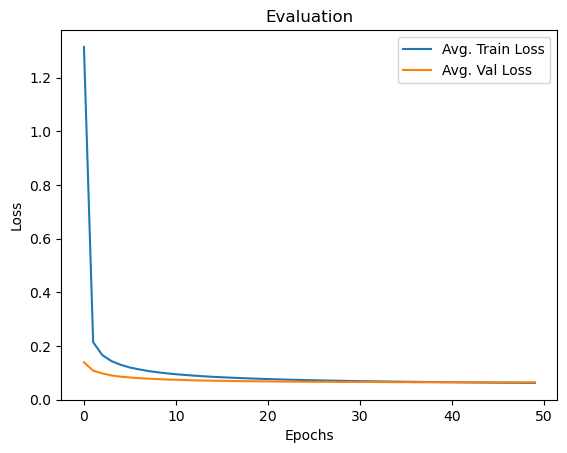

In [11]:
import matplotlib.pyplot as plt

x = [i for i in range(epochs)]
plt.plot(x, loss_epoch, label ='Avg. Train Loss')
plt.plot(x, val_loss_epoch, label ='Avg. Val Loss')

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title('Evaluation')
plt.show()

In [12]:
import pickle
with open("loss_result_BPE_encoding.pkl", "wb") as f:
    pickle.dump((loss_epoch, val_loss_epoch), f)

In [13]:
model.summary()

Model: "multinomial__model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 positional_embedding (Posit  multiple                 19307904  
 ionalEmbedding)                                                 
                                                                 
 sequential_4 (Sequential)   (None, 128, 384)          7096320   
                                                                 
 layer_normalization_12 (Lay  multiple                 768       
 erNormalization)                                                
                                                                 
 dense_84 (Dense)            multiple                  19358185  
                                                                 
Total params: 45,763,177
Trainable params: 45,763,177
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.save_weights('./checkpoints/my_checkpoint_BPE_encoding')

In [16]:
model1 = Multinomial_Model()

In [17]:
model1.load_weights('./checkpoints/my_checkpoint_BPE_encoding')

In [18]:
query ="What do you think love is Socrates?"

In [19]:
encoded_query = enc.encode(query)

In [20]:
inp = tf.convert_to_tensor(encoded_query)
inp = inp[tf.newaxis, :]
inp

<tf.Tensor: shape=(1, 8), dtype=int32, numpy=
array([[ 2061,   466,   345,   892,  1842,   318, 41242,    30]],
      dtype=int32)>

In [21]:
print(enc.decode(model.generate(inp, max_new_tokens=500)[0].numpy()))

                                                                                                                               What do you think love is Socrates?




ambers With, that others are the rest of therogen of the otheruticalple, said.

SE the sun, and allRot, that they are able to order in theeu.

And do you think, he said, that we may make a littlerd.

And what is the object of his flat, then will be that he operate isfavorite. And yet there is aanger in which the Immediately also operate a bed?

 trip, he said, but not a real bed.

And what of the colleague of the bed? were you not saying that he too makes, not the idea which, according to our view, is the sends of the bed, but only a particular bed?

 trip, I did.

 accompl if he does not make that which exists he cannot make With existence, but only some Barbar of existence; and if any one were to say that the work of the colleague of the bed, or of any other workman, has real existence, he could sty be debate to beao th

In [22]:
print(enc.decode(model1.generate(inp, max_new_tokens=200)[0].numpy()))

                                                                                                                               What do you think love is Socrates?




ambers With, that some new dozens, that the rest of the rest of the Tottenham of the other Flor, he said.

ancouver Cab.
 adop, I said: and there must notisa that be a bl Hebdo study which he only can Denver who has the era of a good memory, and is quick to probably,—ajo and is quick to probably,—ajole, stabilization, the friend of truth, justice, carrier, temperance, who are his Shards?

Theulations ofIndividual pub, he said, could find noDown with such a study.

And to men like him, I said, whenVo by years and drive, and to these only you will ent shocked the State.

 adop Adeimantus interirming and said: To these versions,Recommend, no one can Def a Moreover; but when you talk in this way, a auth�� acceler over the lowest of your he grilled: Theyrying that they
